In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 136M/149M [00:01<00:00, 166MB/s]
100% 149M/149M [00:01<00:00, 131MB/s]


In [4]:
!unzip /content/brain-tumor-mri-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

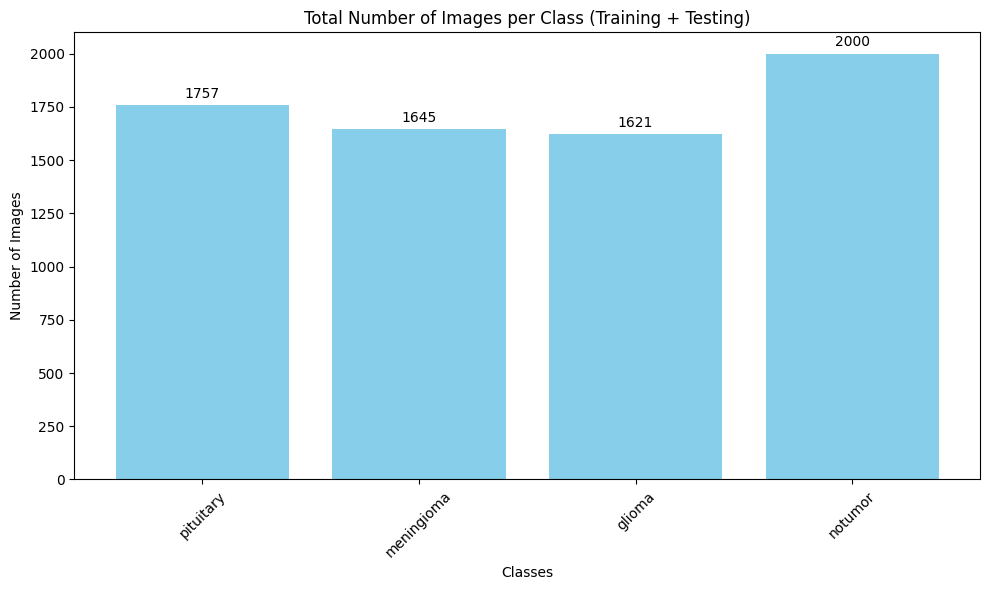

Total Number of Images per Class (Training + Testing):
pituitary: 1757
meningioma: 1645
glioma: 1621
notumor: 2000
Total Number of Images in Training Set: 5712
Total Number of Images in Testing Set: 1311


In [6]:
import os
import matplotlib.pyplot as plt

# Define paths to your training and testing directories
train_dir = '/content/Training'
test_dir = '/content/Testing'

# Function to count number of images in each class folder
def count_images_in_classes(directory):
    classes = os.listdir(directory)
    class_counts = {}
    total_images = 0
    for cls in classes:
        class_path = os.path.join(directory, cls)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[cls] = num_images
            total_images += num_images
    return class_counts, total_images

# Count images in training set
train_class_counts, train_total = count_images_in_classes(train_dir)

# Count images in testing set
test_class_counts, test_total = count_images_in_classes(test_dir)

# Combine counts from training and testing sets
total_class_counts = {}
for cls in train_class_counts:
    total_class_counts[cls] = train_class_counts[cls] + test_class_counts.get(cls, 0)


# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(total_class_counts.keys(), total_class_counts.values(), color='skyblue')

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, int(yval), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class (Training + Testing)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print total number of images in each class
print("Total Number of Images per Class (Training + Testing):")
for cls, count in total_class_counts.items():
    print(f"{cls}: {count}")

# Print total number of images in training and testing sets
print(f"Total Number of Images in Training Set: {train_total}")
print(f"Total Number of Images in Testing Set: {test_total}")

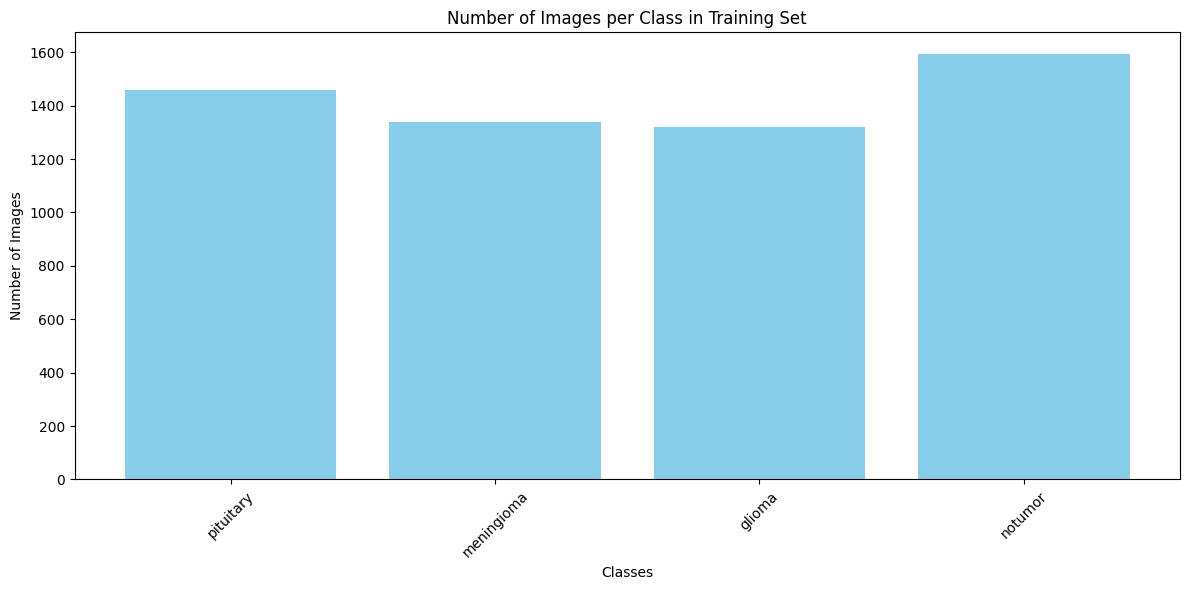

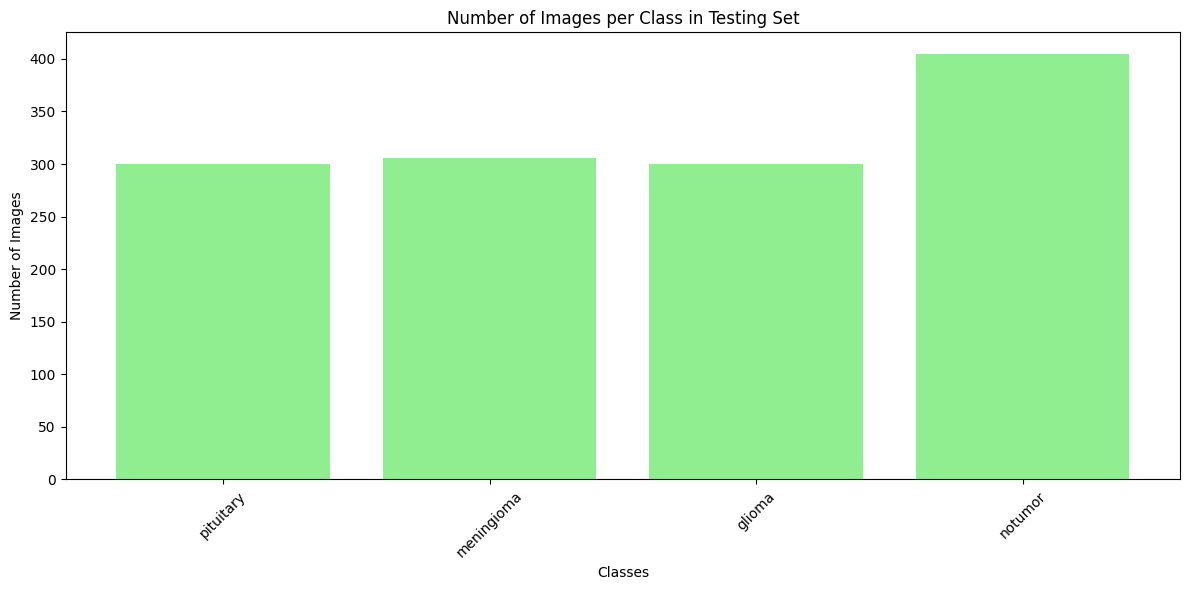

Total Number of Images in Training Set:  5712
Total Number of Images in Testing Set:  1311


In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np


# Define paths to your training and testing directories
train_dir = '/content/Training'
test_dir = '/content/Testing'

# Function to count number of images in each class folder
def count_images_in_classes(directory):
    classes = os.listdir(directory)
    class_counts = {}
    total_images = 0
    for cls in classes:
        class_path = os.path.join(directory, cls)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[cls] = num_images
            total_images += num_images
    return class_counts, total_images

# Count images in training set
train_class_counts, train_total = count_images_in_classes(train_dir)

# Count images in testing set
test_class_counts, test_total = count_images_in_classes(test_dir)

# Plotting training set
plt.figure(figsize=(12, 6))
classes_train = list(train_class_counts.keys())
counts_train = list(train_class_counts.values())
plt.bar(classes_train, counts_train, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting testing set
plt.figure(figsize=(12, 6))
classes_test = list(test_class_counts.keys())
counts_test = list(test_class_counts.values())
plt.bar(classes_test, counts_test, color='lightgreen')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Testing Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print total number of images in training and testing sets
print("Total Number of Images in Training Set: ", train_total)
print("Total Number of Images in Testing Set: ", test_total)
